In [26]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt 
import time
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score
from sklearn.preprocessing import LabelEncoder, label_binarize, StandardScaler
from sklearn.metrics import roc_curve, auc

In [27]:
df = pd.read_csv(r'C:\Users\yekta\Desktop\Exasens.csv')

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 399 entries, 0 to 398
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Diagnosis         399 non-null    object 
 1   ID                399 non-null    object 
 2   Imagery_part_min  100 non-null    float64
 3   Imagery_part_avg  100 non-null    float64
 4   Real_part_min     100 non-null    float64
 5   Real_part_avg     100 non-null    float64
 6   Gender            399 non-null    int64  
 7   Age               399 non-null    int64  
 8   Smoking           399 non-null    int64  
dtypes: float64(4), int64(3), object(2)
memory usage: 28.2+ KB


For Gender, 0= Female, 1=Male
For Diagnosis, COPD =Chronic Obstructive Pulmonary Disease, HC =Healthy Controls


In [29]:
df.head(260)

,Diagnosis,ID,Imagery_part_min,Imagery_part_avg,Real_part_min,Real_part_avg,Gender,Age,Smoking
0,COPD,301-4,-320.61,-300.563531,-495.26,-464.171991,1,77,2
1,COPD,302-3,-325.39,-314.750360,-473.73,-469.263140,0,72,2
2,COPD,303-3,-323.00,-317.436056,-476.12,-471.897667,1,73,3
3,COPD,304-4,-327.78,-317.399670,-473.73,-468.856388,1,76,2
4,COPD,305-4,-325.39,-316.155785,-478.52,-472.869783,0,65,2
...,...,...,...,...,...,...,...,...,...
255,Asthma,A217,NaN,NaN,NaN,NaN,0,55,1
256,Asthma,A218-1,-320.61,-311.917780,-473.73,-469.128595,1,57,1
257,Asthma,A219-4,-327.78,-318.229558,-471.34,-465.302094,0,46,3
258,Asthma,A220-3,-320.61,-311.907785,-471.34,-467.755266,1,53,2


In [30]:
df.isnull().values.any()
df.isnull().sum().sum()

1196

In [31]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Imagery_part_min,100.0,-314.941800,28.422753,-337.350000,-327.780000,-323.000000,-320.610000,-225.0
Imagery_part_avg,100.0,-304.779677,25.834316,-328.280985,-318.476799,-314.327176,-305.072319,-225.0
Real_part_min,100.0,-473.002200,49.009819,-626.860000,-476.120000,-473.730000,-468.950000,-44.0
Real_part_avg,100.0,-458.701666,43.725345,-473.928698,-470.036232,-467.136002,-462.804774,-44.0
Gender,399.0,0.398496,0.490203,0.000000,0.000000,0.000000,1.000000,1.0
Age,399.0,48.736842,18.566962,17.000000,31.000000,49.000000,64.000000,93.0
Smoking,399.0,1.726817,0.742167,1.000000,1.000000,2.000000,2.000000,3.0


In [32]:
(df==0).sum(axis=0)

Diagnosis             0
ID                    0
Imagery_part_min      0
Imagery_part_avg      0
Real_part_min         0
Real_part_avg         0
Gender              240
Age                   0
Smoking               0
dtype: int64

In [33]:
df.isna().sum()

Diagnosis             0
ID                    0
Imagery_part_min    299
Imagery_part_avg    299
Real_part_min       299
Real_part_avg       299
Gender                0
Age                   0
Smoking               0
dtype: int64

In [34]:
print(df.columns)

Index(['Diagnosis', 'ID', 'Imagery_part_min', 'Imagery_part_avg',
       'Real_part_min', 'Real_part_avg', 'Gender', 'Age', 'Smoking'],
      dtype='object')


In [35]:
# Create the df1 DataFrame
df1 = df.drop(['ID', 'Imagery_part_min', 'Imagery_part_avg', 'Real_part_min', 'Real_part_avg'], axis=1)

# Show the first few rows of the df1 DataFrame
df1.head()


,Diagnosis,Gender,Age,Smoking
0,COPD,1,77,2
1,COPD,0,72,2
2,COPD,1,73,3
3,COPD,1,76,2
4,COPD,0,65,2


In [36]:
df1.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Gender,399.0,0.398496,0.490203,0.0,0.0,0.0,1.0,1.0
Age,399.0,48.736842,18.566962,17.0,31.0,49.0,64.0,93.0
Smoking,399.0,1.726817,0.742167,1.0,1.0,2.0,2.0,3.0


In [37]:
df1.head()

,Diagnosis,Gender,Age,Smoking
0,COPD,1,77,2
1,COPD,0,72,2
2,COPD,1,73,3
3,COPD,1,76,2
4,COPD,0,65,2


In [38]:
df1=df1.dropna(axis=0, how='any')
df1.head()
df1.isna().sum()

Diagnosis    0
Gender       0
Age          0
Smoking      0
dtype: int64

In [39]:
print(df1.dtypes)

Diagnosis    object
Gender        int64
Age           int64
Smoking       int64
dtype: object


In [40]:
df1['Diagnosis'] = df1['Diagnosis'].astype("category")
df1['Gender'] = df1['Gender'].astype("category")
df1['Smoking'] = df1['Smoking'].astype("category")

In [41]:
print(df1.dtypes)

Diagnosis    category
Gender       category
Age             int64
Smoking      category
dtype: object


In [42]:
df2 = pd.get_dummies(
  df1,
  # Specify the columns from the instructions
  columns=["Gender", "Smoking"], drop_first=True
  # Set the prefi
)

In [43]:
df2.head()

,Diagnosis,Age,Gender_1,Smoking_2,Smoking_3
0,COPD,77,1,1,0
1,COPD,72,0,1,0
2,COPD,73,1,0,1
3,COPD,76,1,1,0
4,COPD,65,0,1,0


In [44]:
df2.columns = ['Diagnosis', 'Age', 'Male', 'ex-Smoker', 'Current Smoker']

In [45]:
df2.head()

,Diagnosis,Age,Male,ex-Smoker,Current Smoker
0,COPD,77,1,1,0
1,COPD,72,0,1,0
2,COPD,73,1,0,1
3,COPD,76,1,1,0
4,COPD,65,0,1,0


In [46]:
# Separate the dataset into features (X) and target variable (y)
X = df2.drop('Diagnosis', axis=1)
y = df2['Diagnosis']


C:\Users\yekta\AppData\Local\Temp\ipykernel_10524\2287223563.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


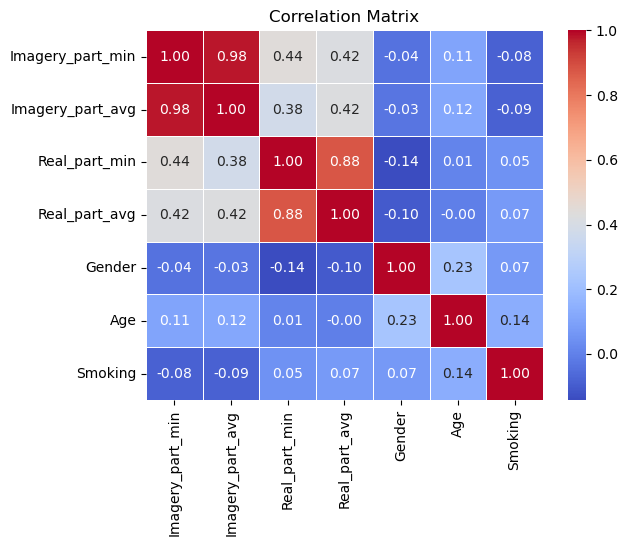

In [47]:
# Correlation Matrix
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Correlation Matrix")
plt.show()

In [48]:
# Label Encoding
le = LabelEncoder()
y = le.fit_transform(y)

In [49]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [50]:
# Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [51]:
# Predictions
rf_predictions = rf_model.predict(X_test)


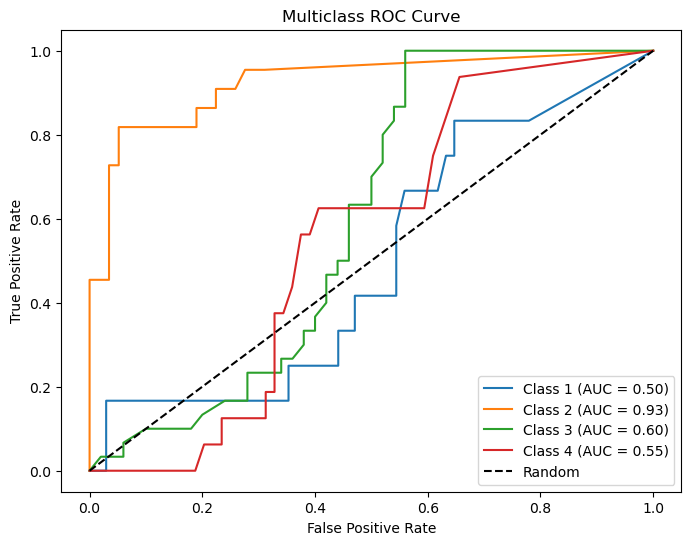

Class 1 AUC Score: 0.50
Class 2 AUC Score: 0.93
Class 3 AUC Score: 0.60
Class 4 AUC Score: 0.55


In [52]:
# One-hot encode the true labels
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))

# Get predicted probabilities for each class
y_score = rf_model.predict_proba(X_test)

# Initialize variables to store fpr, tpr, and auc for each class
all_fpr = []
all_tpr = []
all_auc = []

# Calculate ROC curve and AUC for each class
for i in range(len(np.unique(y_test))):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)
    
    all_fpr.append(fpr)
    all_tpr.append(tpr)
    all_auc.append(roc_auc)

# Plot the ROC curve for each class
plt.figure(figsize=(8, 6))
for i in range(len(np.unique(y_test))):
    plt.plot(all_fpr[i], all_tpr[i], label=f'Class {i+1} (AUC = {all_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass ROC Curve')
plt.legend(loc='lower right')
plt.show()

# Print AUC scores for each class
for i, auc_score in enumerate(all_auc):
    print(f'Class {i+1} AUC Score: {auc_score:.2f}')

In [54]:
# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [55]:
# Logistic Regression
lr_model = LogisticRegression(random_state=42, max_iter=1000)
lr_model.fit(X_train_scaled, y_train)


LogisticRegression(max_iter=1000, random_state=42)

In [56]:
# Predictions
lr_predictions = lr_model.predict(X_test_scaled)


In [57]:
# Evaluation metrics
lr_accuracy = accuracy_score(y_test, lr_predictions)
lr_classification_report = classification_report(y_test, lr_predictions, zero_division=1)
lr_confusion_matrix = confusion_matrix(y_test, lr_predictions)
lr_roc_auc = roc_auc_score(y_test_bin, lr_model.predict_proba(X_test_scaled), multi_class='ovr')


In [58]:
print("\nLogistic Regression:")
print("Accuracy:", lr_accuracy)
print("Classification Report:\n", lr_classification_report)
print("Confusion Matrix:\n", lr_confusion_matrix)
print("AUC Score:", lr_roc_auc)



Logistic Regression:
Accuracy: 0.625
Classification Report:
               precision    recall  f1-score   support

           0       0.42      0.42      0.42        12
           1       0.87      0.91      0.89        22
           2       0.56      0.83      0.67        30
           3       1.00      0.00      0.00        16

    accuracy                           0.62        80
   macro avg       0.71      0.54      0.49        80
weighted avg       0.71      0.62      0.56        80

Confusion Matrix:
 [[ 5  2  5  0]
 [ 1 20  1  0]
 [ 4  1 25  0]
 [ 2  0 14  0]]
AUC Score: 0.7731036999647528


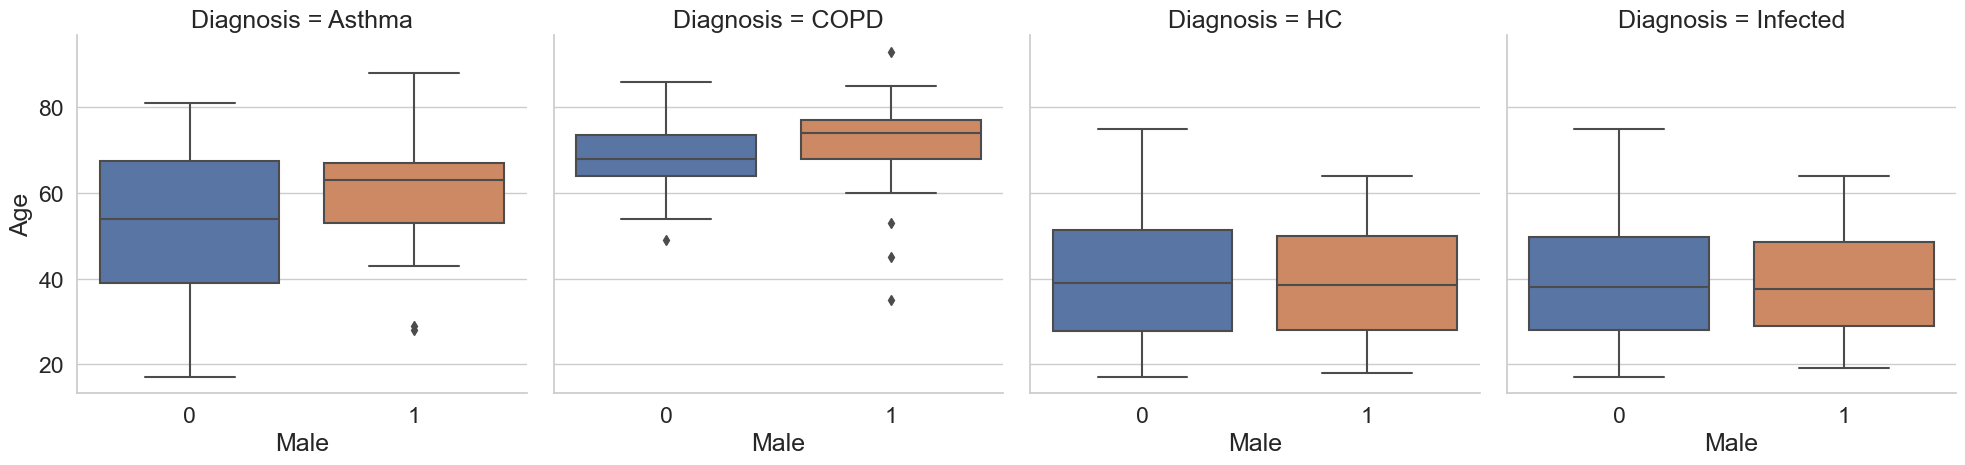

In [59]:
sns.set(font_scale=1.5)
sns.set_style("whitegrid")
sns.catplot(
    x='Male',
    y='Age',
    data=df2,
    kind='box',
    col='Diagnosis')

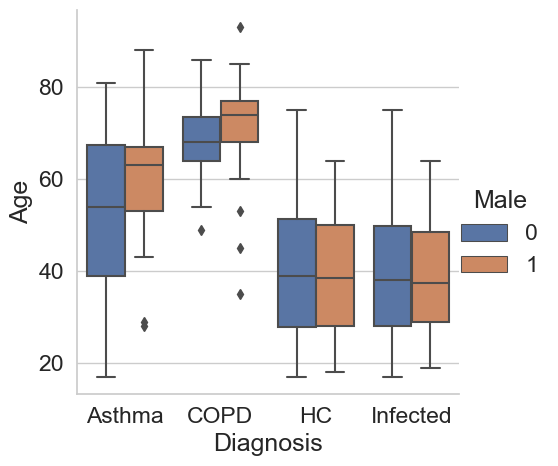

In [60]:
sns.set(font_scale=1.5)
sns.set_style("whitegrid")
sns.catplot(
    x='Diagnosis',
    y='Age',
    data=df2,
    kind='box',
    hue='Male')



In [61]:
df1['Gender'].replace({0:'Female', 1:'Male'}, inplace=True)

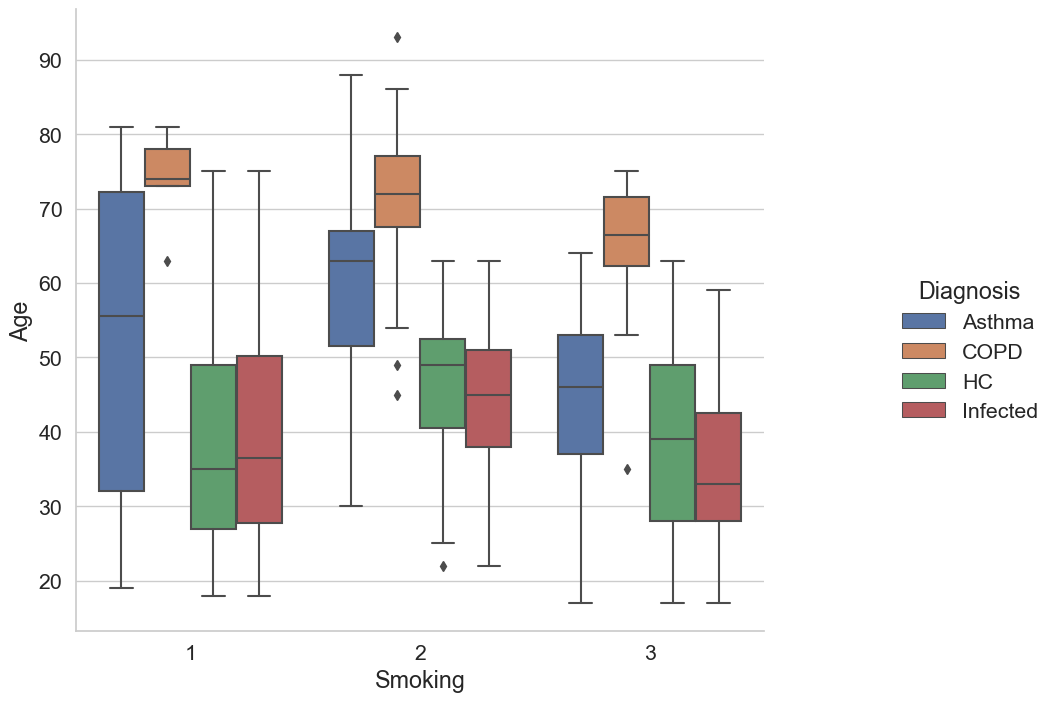

In [62]:
sns.set(font_scale=1.4)
sns.set_style("whitegrid")
sns.catplot(
    x='Smoking',
    y='Age',
    data=df1,
    kind='box',
    hue='Diagnosis')
fig =plt.gcf()
fig.set_size_inches(12, 8)

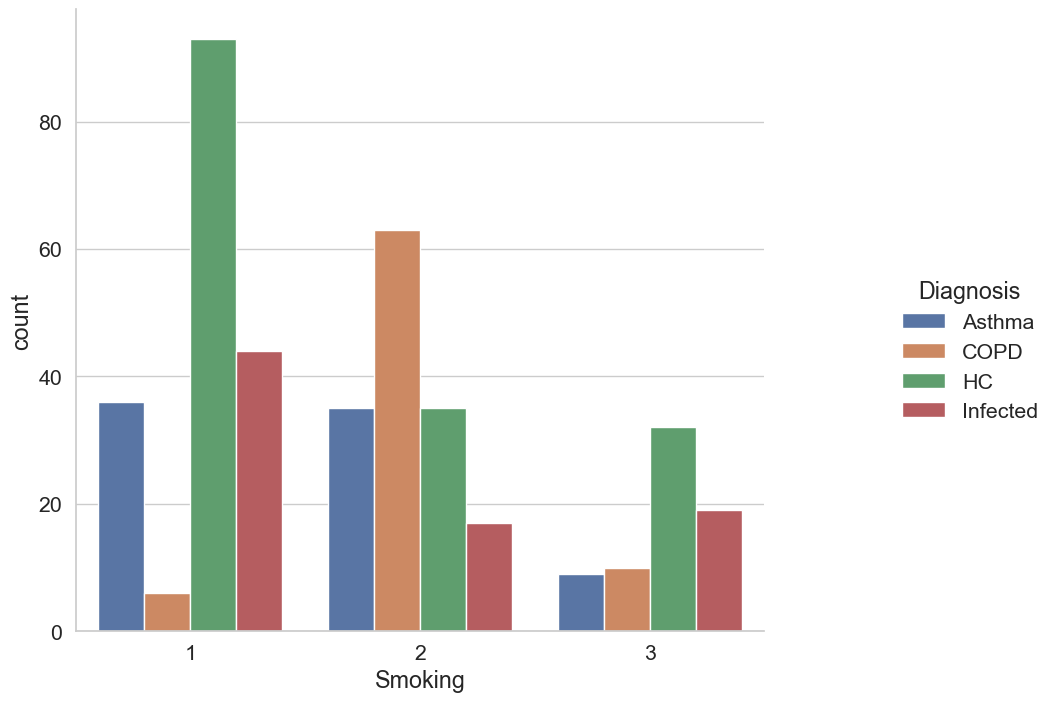

In [63]:
sns.set(font_scale=1.4)
sns.set_style("whitegrid")
sns.catplot(
    x='Smoking',
    data=df1,
    kind='count',
    hue='Diagnosis')
fig =plt.gcf()
fig.set_size_inches(12, 8)

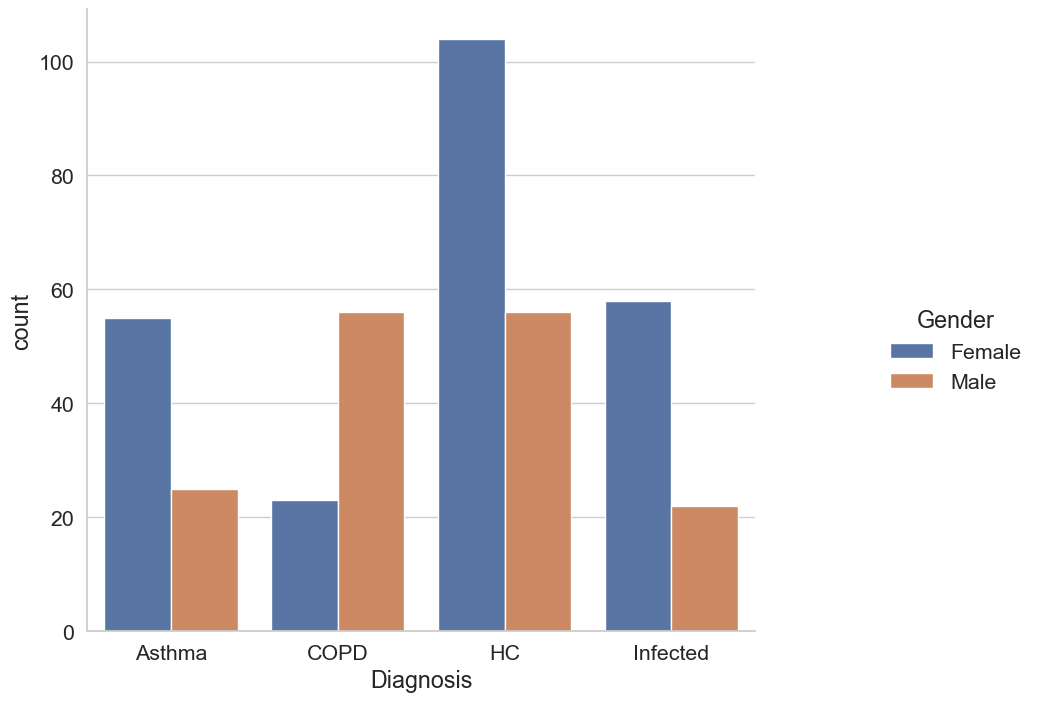

In [64]:
sns.set(font_scale=1.4)
sns.set_style("whitegrid")
sns.catplot(
    x='Diagnosis',
    data=df1,
    kind='count',
    hue='Gender')
fig =plt.gcf()
fig.set_size_inches(12, 8)

In [65]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('Age ~ C(Diagnosis)', data=df1).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(Diagnosis),63924.421744,3.0,114.858577,1.739059e-53
Residual,73278.946677,395.0,NaN,NaN


In [66]:
pair_t = model.t_test_pairwise('C(Diagnosis)', method='Bonferroni')
pair_t.result_frame

,coef,std err,t,P>|t|,Conf. Int. Low,Conf. Int. Upp.,pvalue-Bonferroni,reject-Bonferroni
COPD-Asthma,15.498418,2.160385,7.173916,3.625566e-12,11.251128,19.745708,2.175339e-11,True
HC-Asthma,-15.887500,1.865055,-8.518514,3.437762e-16,-19.554176,-12.220824,2.062657e-15,True
Infected-Asthma,-16.637500,2.153580,-7.725507,9.283248e-14,-20.871413,-12.403587,5.569949e-13,True
HC-COPD,-31.385918,1.872908,-16.757852,5.347169e-48,-35.068032,-27.703803,3.208302e-47,True
Infected-COPD,-32.135918,2.160385,-14.875091,4.701564e-40,-36.383208,-27.888628,2.820939e-39,True
Infected-HC,-0.750000,1.865055,-0.402133,6.878038e-01,-4.416676,2.916676,1.000000e+00,False


In [67]:
# Select data showing the relationship between smoking males and females
subset_data = df1[(df1['Smoking'] != 'Never Smoked') & (df1['Gender'].isin(['Male', 'Female']))]


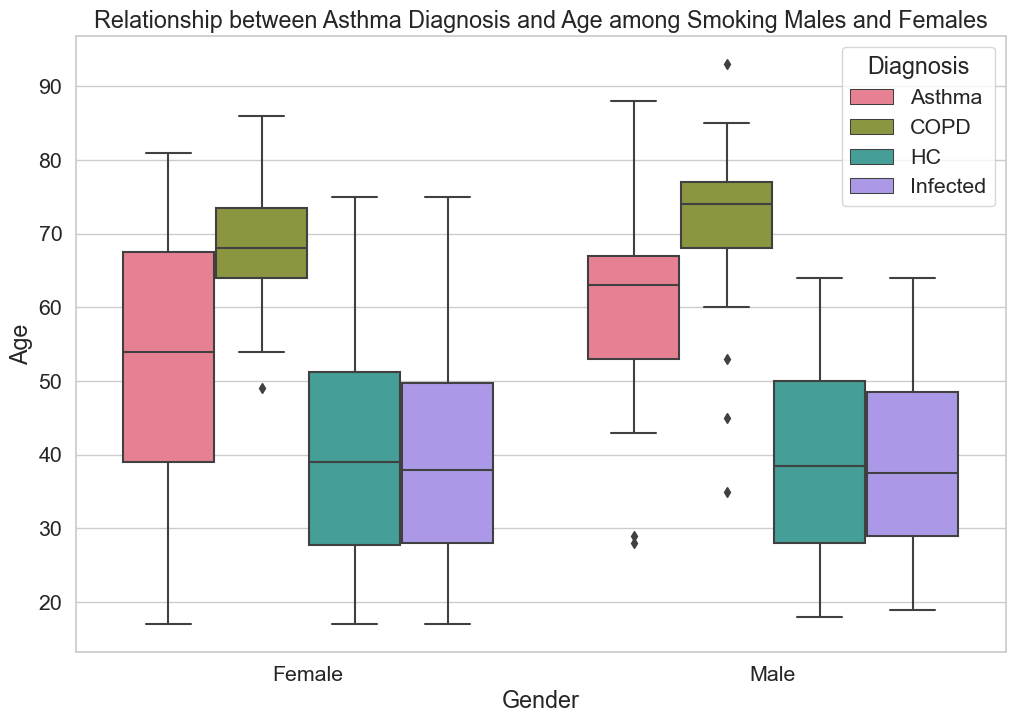

In [68]:
# Create a boxplot
plt.figure(figsize=(12, 8))
sns.boxplot(x='Gender', y='Age', hue='Diagnosis', data=subset_data, palette='husl')
plt.title('Relationship between Asthma Diagnosis and Age among Smoking Males and Females')
plt.xlabel('Gender')
plt.ylabel('Age')
plt.show()


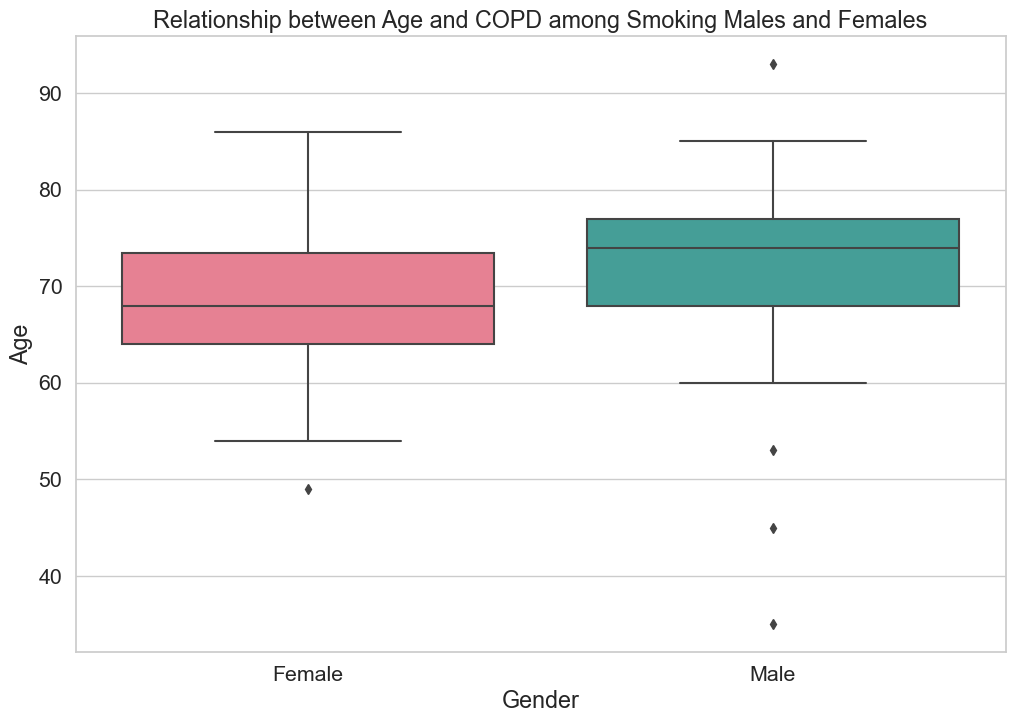

In [69]:
# Select data for COPD
subset_data_copd = df1[(df1['Smoking'] != 'Never Smoked') & (df1['Gender'].isin(['Male', 'Female'])) & (df1['Diagnosis'] == 'COPD')]

# Create a boxplot
plt.figure(figsize=(12, 8))
sns.boxplot(x='Gender', y='Age', data=subset_data_copd, palette='husl')
plt.title('Relationship between Age and COPD among Smoking Males and Females')
plt.xlabel('Gender')
plt.ylabel('Age')
plt.show()


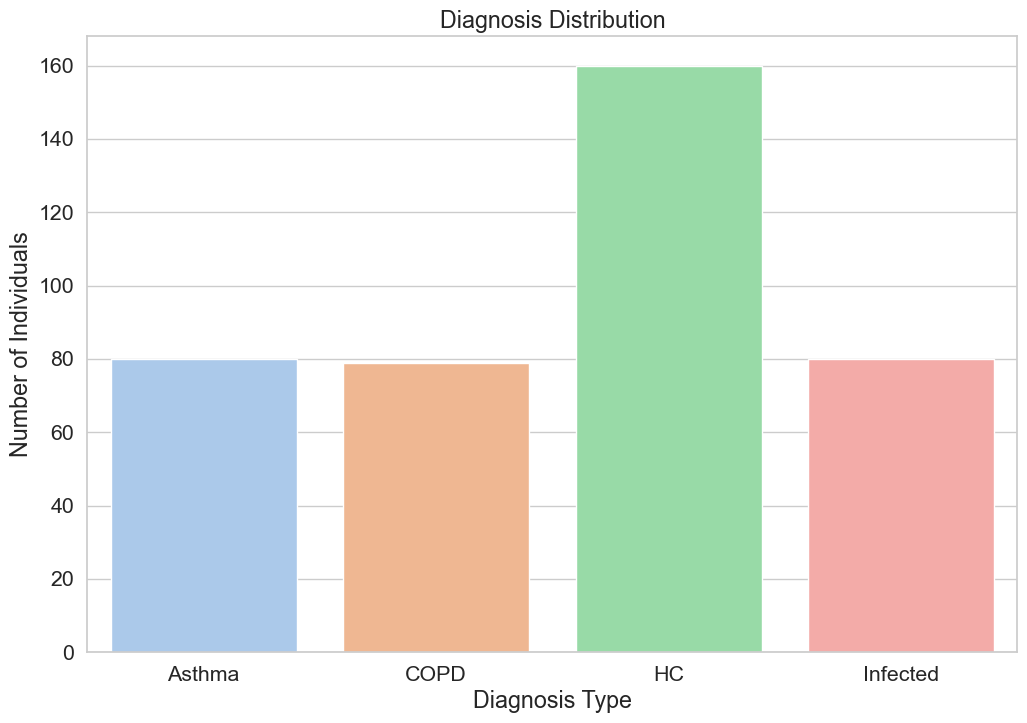

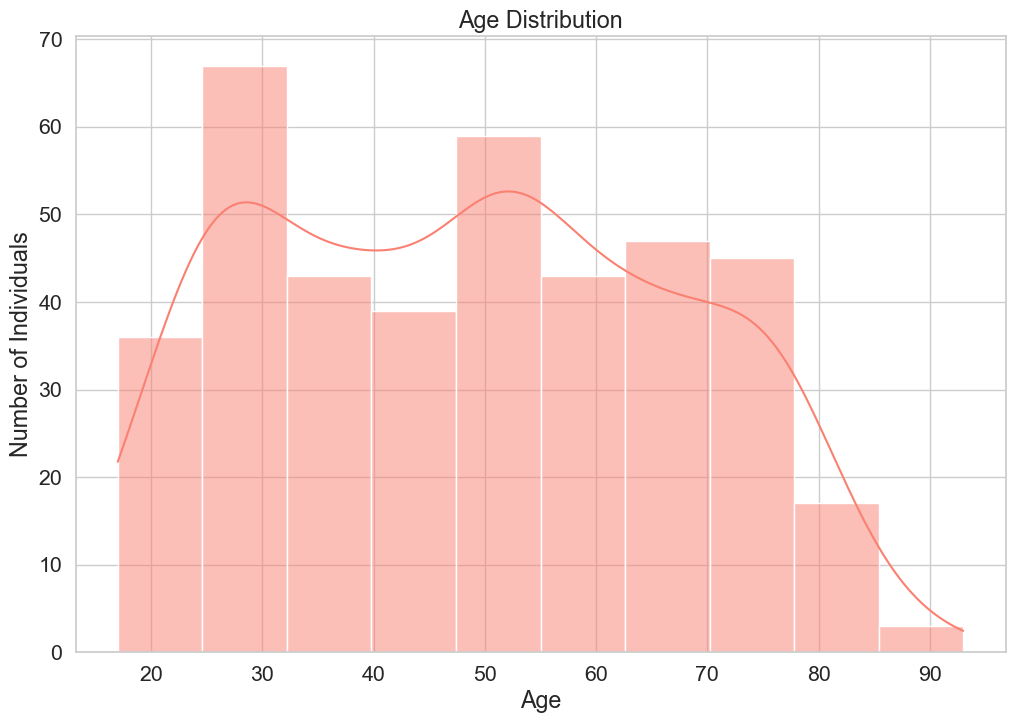

In [70]:
# Diagnosis Distribution
plt.figure(figsize=(12, 8))
sns.countplot(x='Diagnosis', data=df1, palette='pastel')
plt.title('Diagnosis Distribution')
plt.xlabel('Diagnosis Type')
plt.ylabel('Number of Individuals')
plt.show()

# Age Distribution
plt.figure(figsize=(12, 8))
sns.histplot(df1['Age'], kde=True, color='salmon')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Number of Individuals')
plt.show()


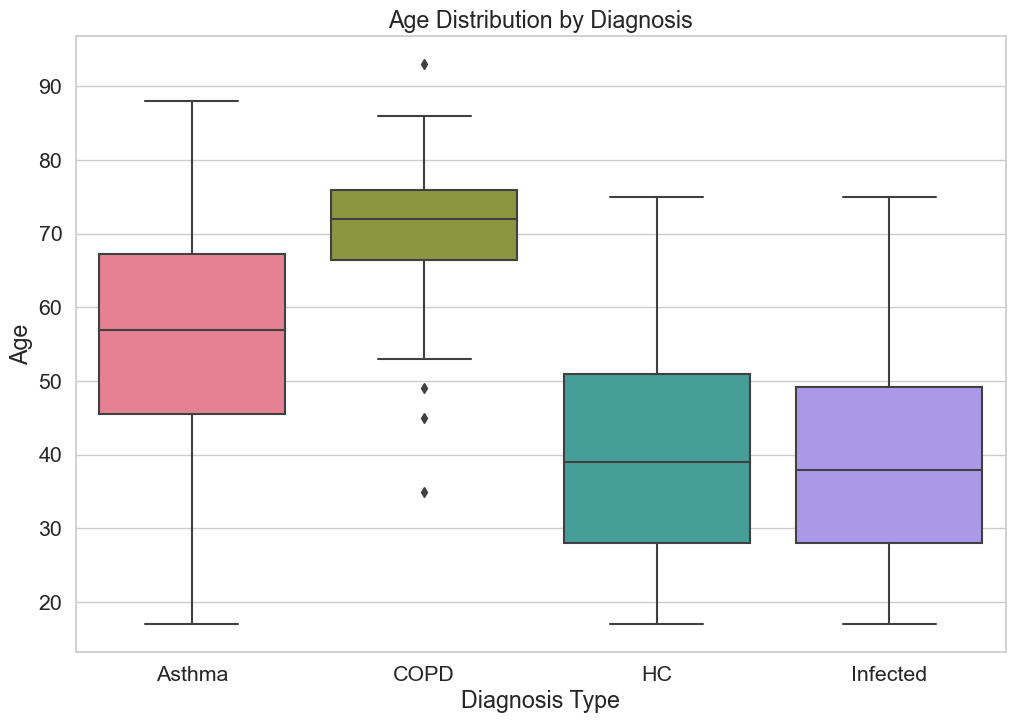

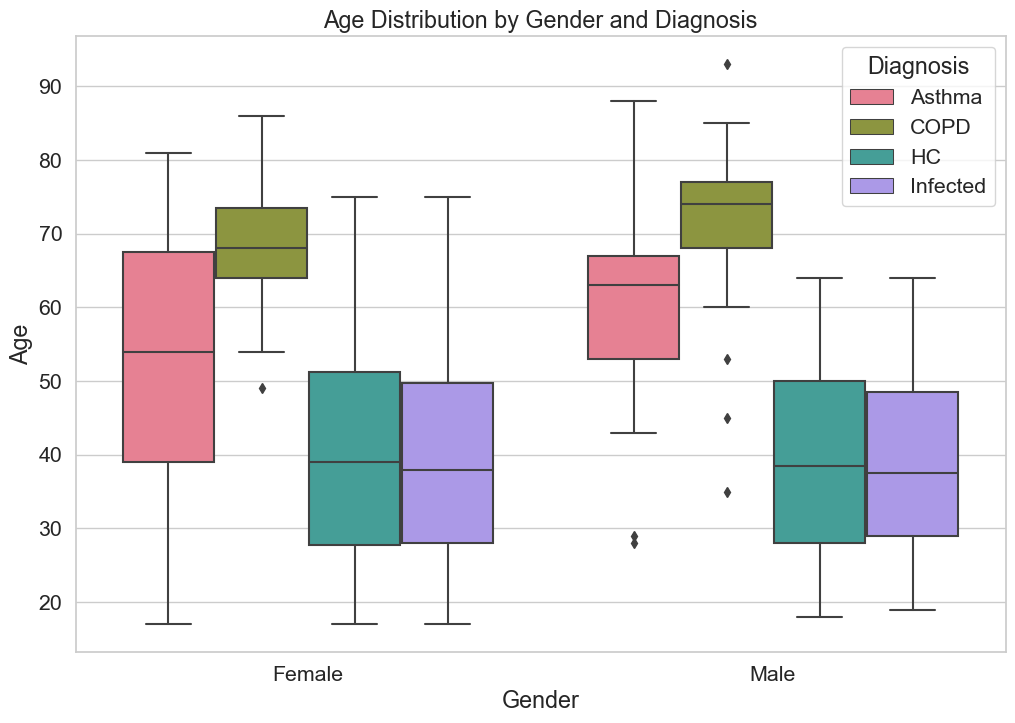

In [71]:
# Boxplot by Diagnosis
plt.figure(figsize=(12, 8))
sns.boxplot(x='Diagnosis', y='Age', data=df1, palette='husl')
plt.title('Age Distribution by Diagnosis')
plt.xlabel('Diagnosis Type')
plt.ylabel('Age')
plt.show()

# Boxplot by Gender and Diagnosis
plt.figure(figsize=(12, 8))
sns.boxplot(x='Gender', y='Age', hue='Diagnosis', data=df1, palette='husl')
plt.title('Age Distribution by Gender and Diagnosis')
plt.xlabel('Gender')
plt.ylabel('Age')
plt.show()


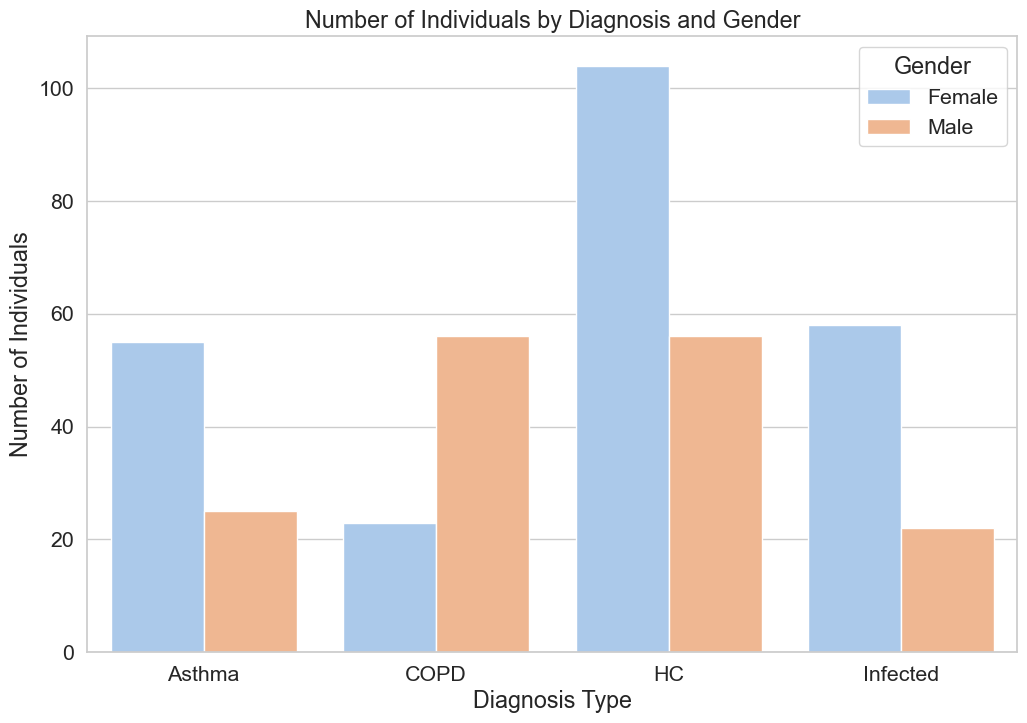

In [72]:
# Bar plot by Diagnosis and Gender
plt.figure(figsize=(12, 8))
sns.countplot(x='Diagnosis', hue='Gender', data=df1, palette='pastel')
plt.title('Number of Individuals by Diagnosis and Gender')
plt.xlabel('Diagnosis Type')
plt.ylabel('Number of Individuals')
plt.show()


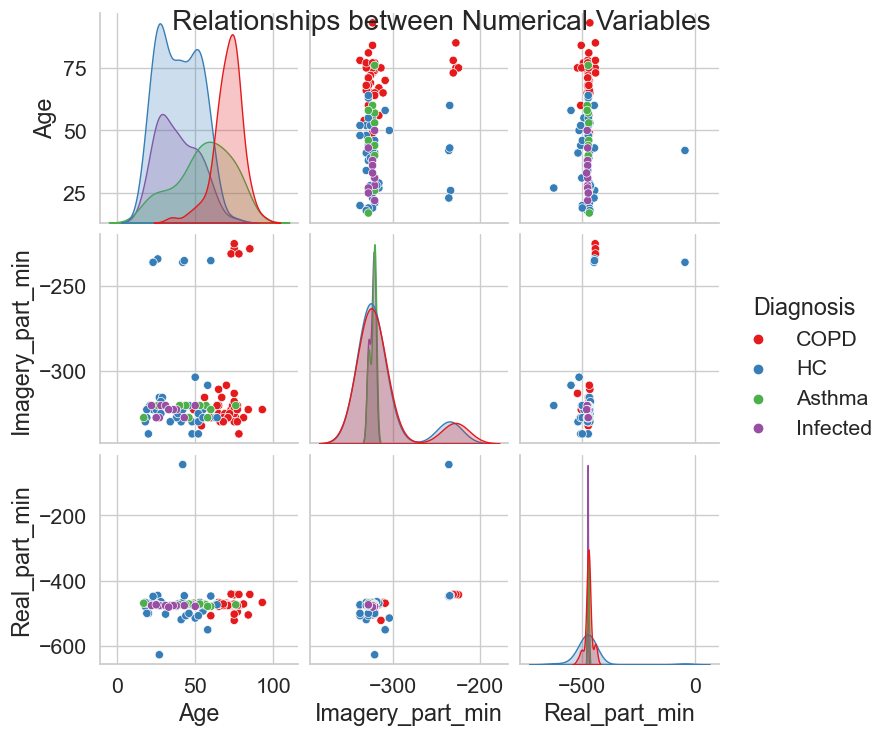

In [73]:
# Pairplot for numerical variables
sns.pairplot(df[['Age', 'Imagery_part_min', 'Real_part_min', 'Diagnosis']], hue='Diagnosis', palette='Set1')
plt.suptitle('Relationships between Numerical Variables')
plt.show()


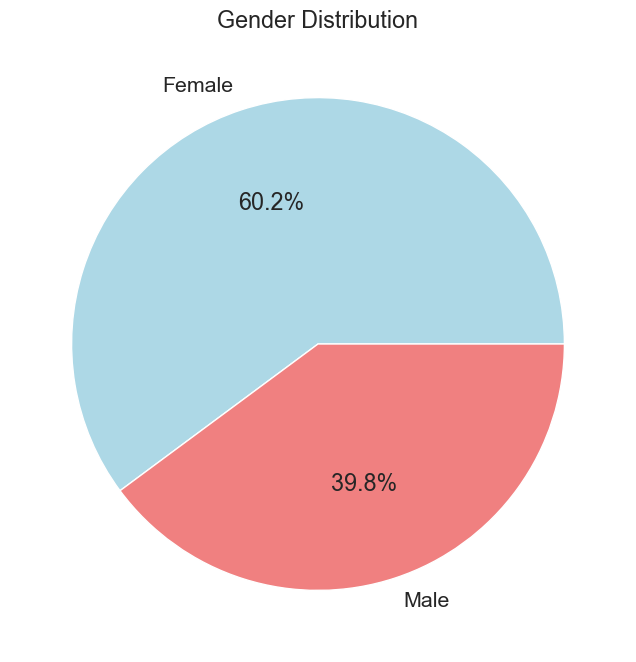

In [74]:
# Categorical data plot
gender_count = df1['Gender'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(gender_count, labels=gender_count.index, autopct='%1.1f%%', colors=['lightblue', 'lightcoral'])
plt.title('Gender Distribution')
plt.show()


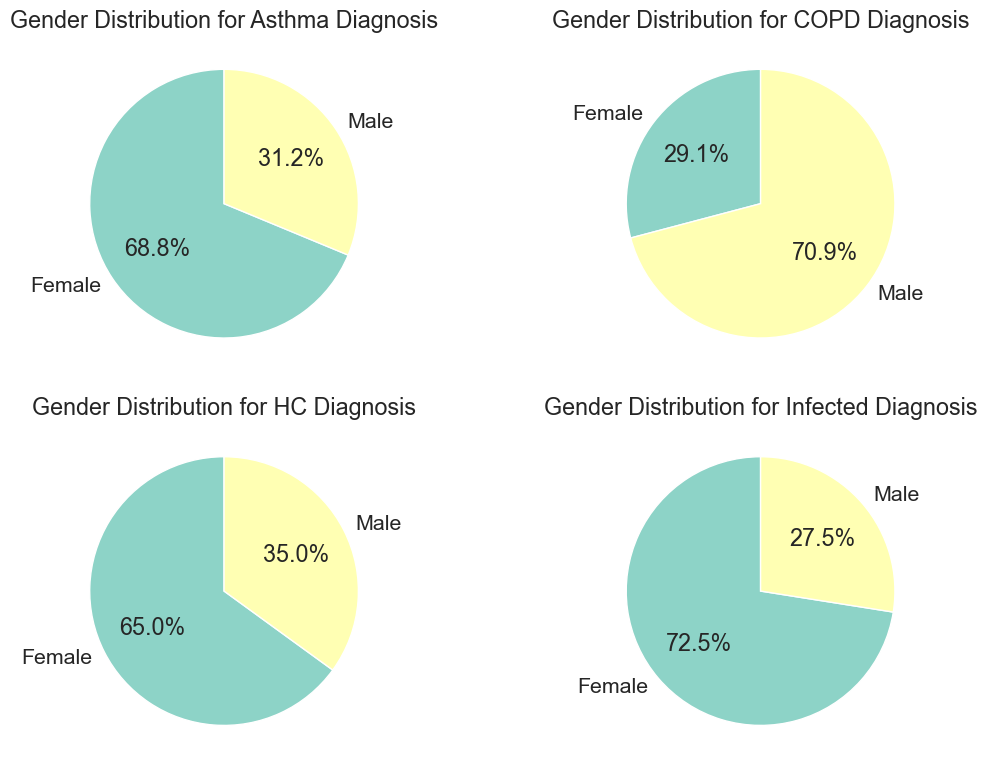

In [75]:
# DataFrame showing Gender and Diagnosis Distribution
gender_diagnosis_df = df1.groupby(['Diagnosis', 'Gender']).size().unstack()

# Color palette for the pie chart
colors = sns.color_palette('Set3', len(gender_diagnosis_df.columns))

# Create pie charts
plt.figure(figsize=(12, 8))
for i, (diagnosis, row) in enumerate(gender_diagnosis_df.iterrows()):
    plt.subplot(2, 2, i+1)
    plt.pie(row, labels=row.index, autopct='%1.1f%%', colors=colors, startangle=90)
    plt.title(f'Gender Distribution for {diagnosis} Diagnosis')

plt.tight_layout()
plt.show()


C:\Users\yekta\AppData\Local\Temp\ipykernel_10524\4229532767.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  male_patients['Age_Group'] = pd.cut(male_patients['Age'], bins=age_bins, labels=age_labels, right=False)


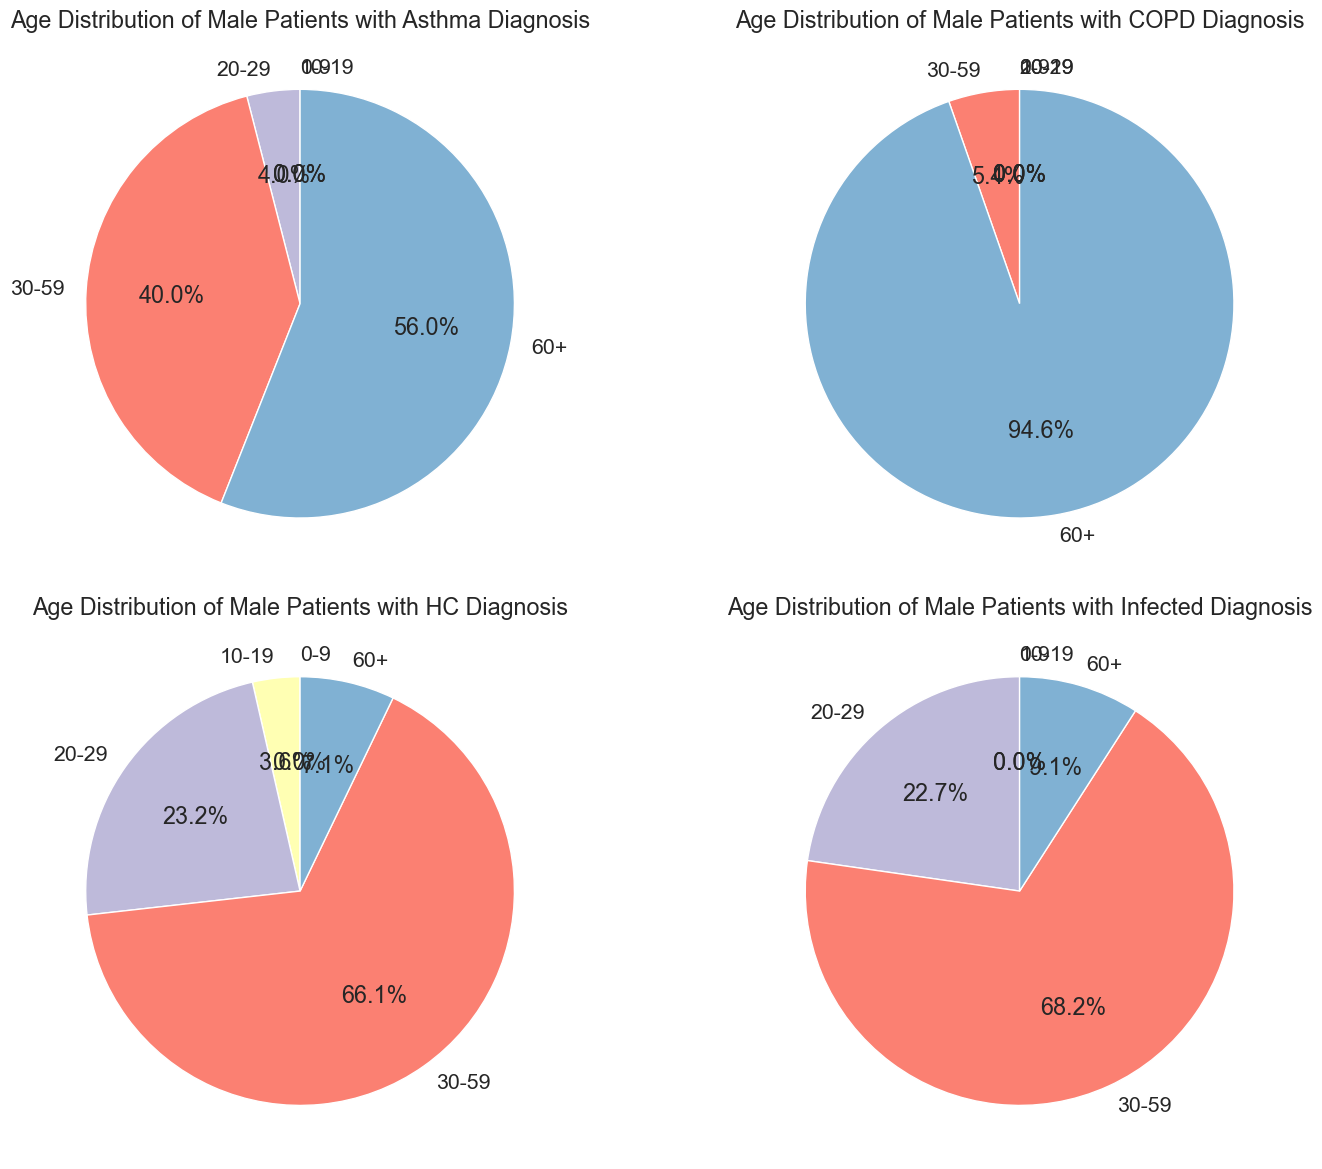

In [76]:
# Select male patients
male_patients = df1[df1['Gender'] == 'Male']

# Define age groups
age_bins = [0, 9, 19, 29, 59, 100]
age_labels = ['0-9', '10-19', '20-29', '30-59', '60+']

# Create a new column with age groups
male_patients['Age_Group'] = pd.cut(male_patients['Age'], bins=age_bins, labels=age_labels, right=False)

# Get the count of male patients by age group
age_distribution = male_patients.groupby(['Diagnosis', 'Age_Group']).size().unstack()

# Color palette
colors = sns.color_palette('Set3', len(age_distribution.columns))

# Set pie chart dimensions
plt.figure(figsize=(16, 12))

# Draw a separate pie chart for each diagnosis
for i, (diagnosis, row) in enumerate(age_distribution.iterrows()):
    plt.subplot(2, 2, i+1)
    plt.pie(row, labels=row.index, autopct='%1.1f%%', colors=colors, startangle=90)
    plt.title(f'Age Distribution of Male Patients with {diagnosis} Diagnosis')

plt.tight_layout()
plt.show()


C:\Users\yekta\AppData\Local\Temp\ipykernel_10524\658920177.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  female_patients['Age_Group'] = pd.cut(female_patients['Age'], bins=age_bins, labels=age_labels, right=False)


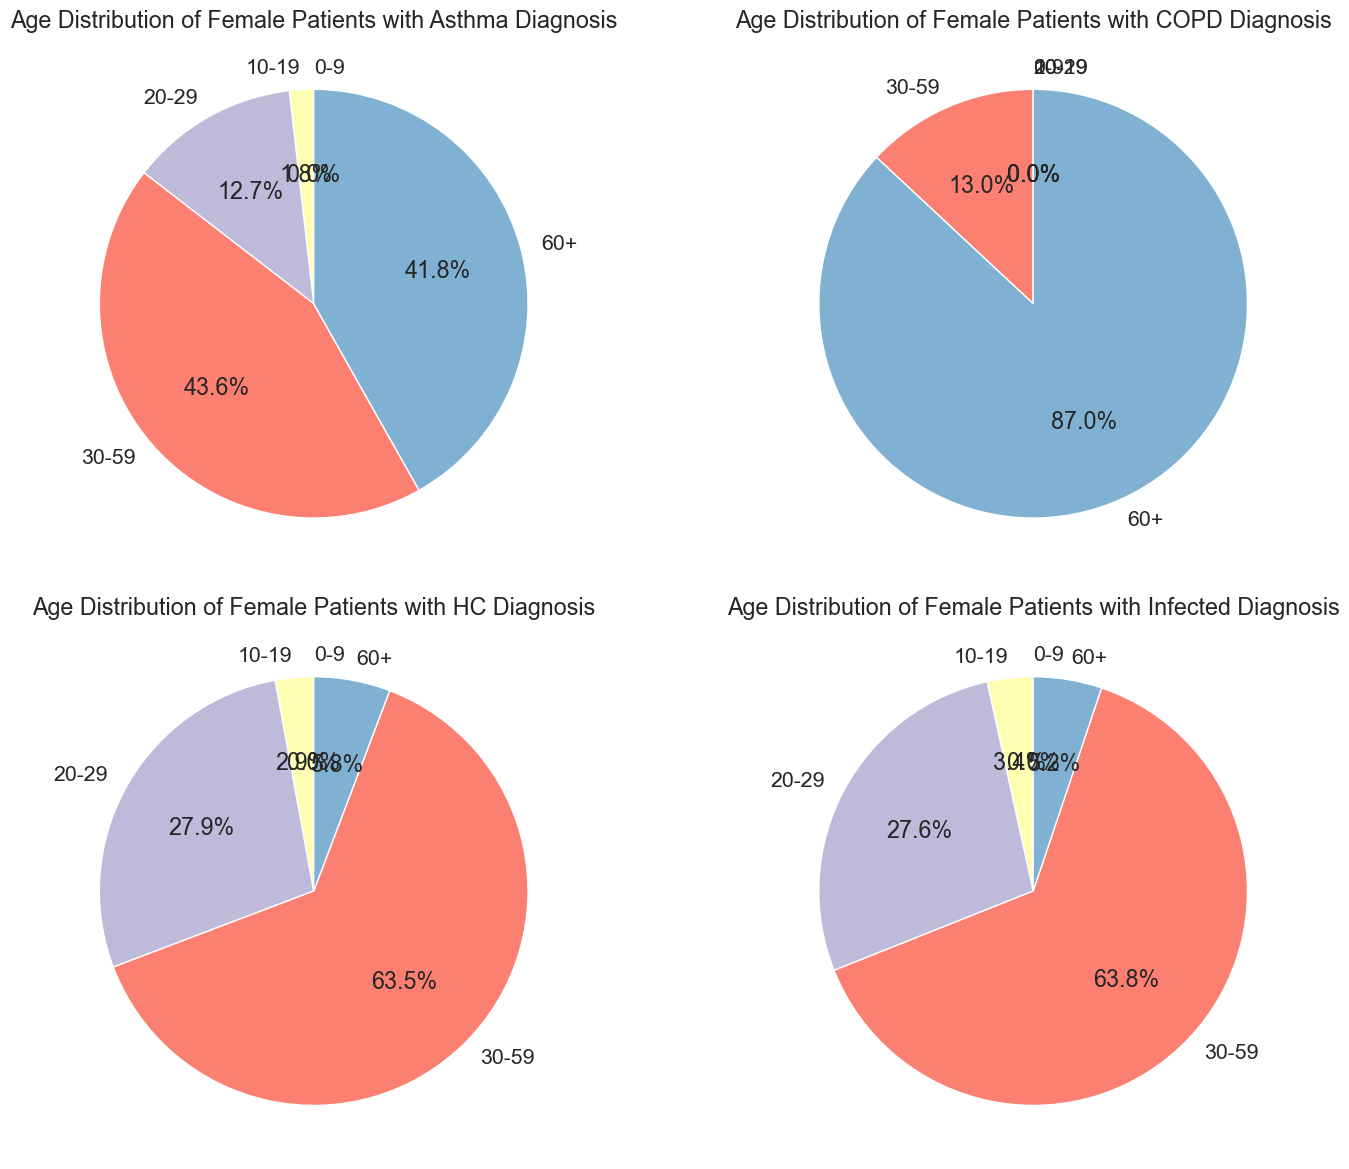

In [77]:
# Select female patients
female_patients = df1[df1['Gender'] == 'Female']

# Define age groups
age_bins = [0, 9, 19, 29, 59, 100]
age_labels = ['0-9', '10-19', '20-29', '30-59', '60+']

# Create a new column with age groups
female_patients['Age_Group'] = pd.cut(female_patients['Age'], bins=age_bins, labels=age_labels, right=False)

# Get the count of female patients by age group
age_distribution = female_patients.groupby(['Diagnosis', 'Age_Group']).size().unstack()

# Color palette
colors = sns.color_palette('Set3', len(age_distribution.columns))

# Set pie chart dimensions
plt.figure(figsize=(16, 12))

# Draw a separate pie chart for each diagnosis
for i, (diagnosis, row) in enumerate(age_distribution.iterrows()):
    plt.subplot(2, 2, i+1)
    plt.pie(row, labels=row.index, autopct='%1.1f%%', colors=colors, startangle=90)
    plt.title(f'Age Distribution of Female Patients with {diagnosis} Diagnosis')

plt.tight_layout()
plt.show()

